<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/GL_ML_Pregnant_US_KNNIMPUTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [242]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [243]:
# Read the Training Data
train_data = pd.read_csv("/content/drive/MyDrive/GeekLurn_ML_Session/Proj2_Train.csv")

In [244]:
# Read the test Data
test_data = pd.read_csv("/content/drive/MyDrive/GeekLurn_ML_Session/Proj2_Test.csv")

In [245]:
train_data.shape,test_data.shape

((1000, 16), (100, 15))

In [246]:
df = pd.concat([train_data,test_data],axis = 0)

In [247]:
df.shape

(1100, 16)

In [248]:
df.head()

,Sl No,Sample ID,Age,Ob_Score,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode,Unnamed: 15
0,1,DT1,20,G1,28.255713,2,0,0,1,0,3,NaN,NaN,1,1,NaN
1,2,DT2,21,G1,29.772191,2,0,1,1,0,4,NaN,NaN,1,1,NaN
2,3,DT3,21,G1,28.511248,2,0,1,1,0,4,NaN,NaN,1,1,NaN
3,4,DT4,22,G1,28.772695,2,0,1,1,0,4,NaN,NaN,1,1,NaN
4,5,DT5,22,G1,27.488918,2,0,0,1,0,3,NaN,NaN,1,1,NaN


In [249]:
df.isnull().sum()

Sl No                    0
Sample ID                0
Age                      0
Ob_Score                 0
BMI                      0
Consistency_Score        0
Position_Score           0
Effacement_Score         0
Dialation_Score          0
Station_Score            0
Total_Bishop_Score       0
Cerv_Len_cms           660
Cerv_Wid_cms           660
Induction                0
Del_mode                 0
Unnamed: 15           1100
dtype: int64

In [250]:
#Removing Unnecessary Features
df.drop(['Sl No','Sample ID','Unnamed: 15','Consistency_Score'], axis = 1, inplace = True)

In [251]:
df.head()

,Age,Ob_Score,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode
0,20,G1,28.255713,0,0,1,0,3,NaN,NaN,1,1
1,21,G1,29.772191,0,1,1,0,4,NaN,NaN,1,1
2,21,G1,28.511248,0,1,1,0,4,NaN,NaN,1,1
3,22,G1,28.772695,0,1,1,0,4,NaN,NaN,1,1
4,22,G1,27.488918,0,0,1,0,3,NaN,NaN,1,1


In [252]:
df.isnull().sum()

Age                     0
Ob_Score                0
BMI                     0
Position_Score          0
Effacement_Score        0
Dialation_Score         0
Station_Score           0
Total_Bishop_Score      0
Cerv_Len_cms          660
Cerv_Wid_cms          660
Induction               0
Del_mode                0
dtype: int64

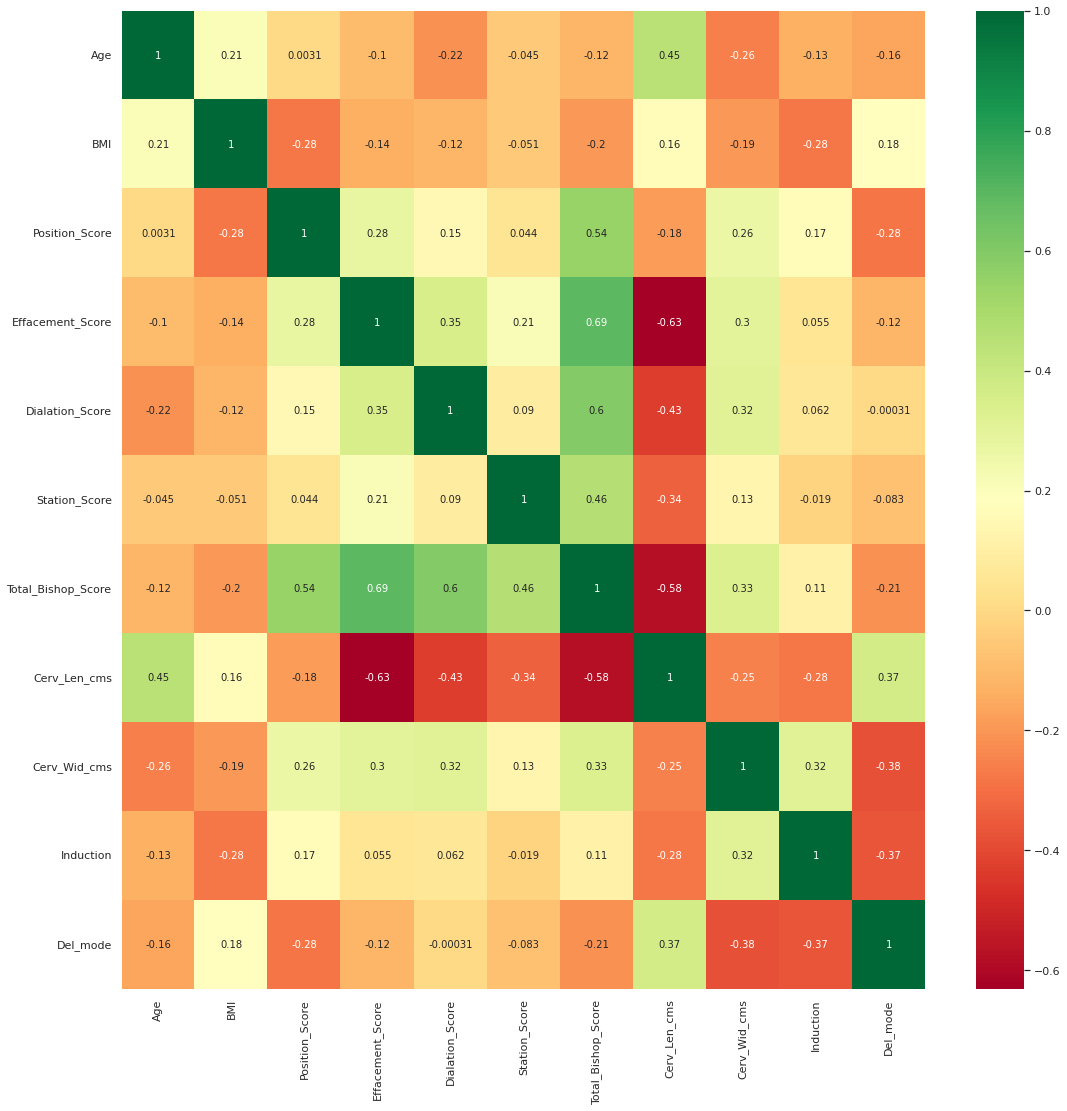

In [253]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [254]:
#median=df.Cerv_Len_cms.median()
#print(median)

#median=df.Cerv_Wid_cms.median()
#print(median)

In [255]:
#df['Cerv_Len_cms_median']=df['Cerv_Len_cms'].fillna(median)
#df['Cerv_Wid_cms_median']=df['Cerv_Wid_cms'].fillna(median)

In [256]:
#fig = plt.figure()
#ax = fig.add_subplot(111)
#df['Cerv_Len_cms'].plot(kind='kde', ax=ax, color = 'blue')
#df.Cerv_Len_cms_median.plot(kind='kde', ax=ax, color='red')
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')

In [257]:
df.isnull().sum()

Age                     0
Ob_Score                0
BMI                     0
Position_Score          0
Effacement_Score        0
Dialation_Score         0
Station_Score           0
Total_Bishop_Score      0
Cerv_Len_cms          660
Cerv_Wid_cms          660
Induction               0
Del_mode                0
dtype: int64

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1100 non-null   int64  
 1   Ob_Score            1100 non-null   object 
 2   BMI                 1100 non-null   float64
 3   Position_Score      1100 non-null   int64  
 4   Effacement_Score    1100 non-null   int64  
 5   Dialation_Score     1100 non-null   int64  
 6   Station_Score       1100 non-null   int64  
 7   Total_Bishop_Score  1100 non-null   int64  
 8   Cerv_Len_cms        440 non-null    float64
 9   Cerv_Wid_cms        440 non-null    float64
 10  Induction           1100 non-null   int64  
 11  Del_mode            1100 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 111.7+ KB


In [259]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Ob_Score'] = le.fit_transform(df['Ob_Score'])

In [260]:
df['Ob_Score'].value_counts()

0    1034
1      44
2      22
Name: Ob_Score, dtype: int64

In [261]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [262]:
df.isnull().sum()

Age                   0
Ob_Score              0
BMI                   0
Position_Score        0
Effacement_Score      0
Dialation_Score       0
Station_Score         0
Total_Bishop_Score    0
Cerv_Len_cms          0
Cerv_Wid_cms          0
Induction             0
Del_mode              0
dtype: int64

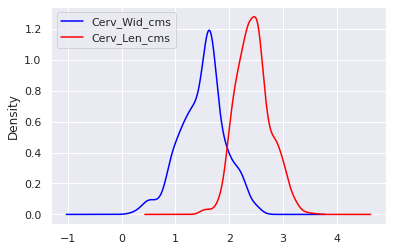

In [263]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Cerv_Wid_cms'].plot(kind='kde', ax=ax, color = 'blue')
df['Cerv_Len_cms'].plot(kind='kde', ax=ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


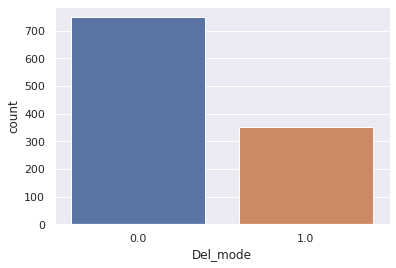

In [264]:
sns.countplot(df['Del_mode'])

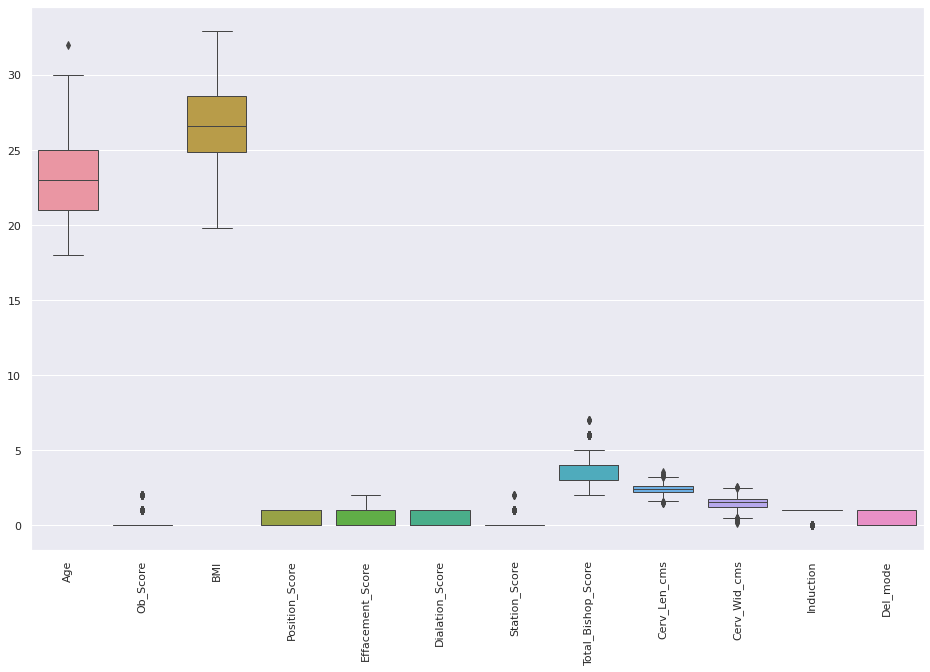

In [265]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [266]:
def outliers (df , ft) :
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound )| (df[ft] > upper_bound )]
    
    return ls

In [267]:
def remove (df, ls ):
    ls = sorted(set(ls))
    df = df.drop(ls)
    
    return df

In [268]:
index_list = []
for feature in [
 'Age',
 'Ob_Score',
 'BMI',
 'Position_Score',
 'Dialation_Score',
 'Station_Score',
 'Total_Bishop_Score',
 'Cerv_Len_cms',
 'Cerv_Wid_cms',
 'Induction',
 'Del_mode']:
    index_list.extend(outliers(df , feature))

In [269]:
df1 = remove(df,index_list)

In [270]:
df1.shape

(732, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


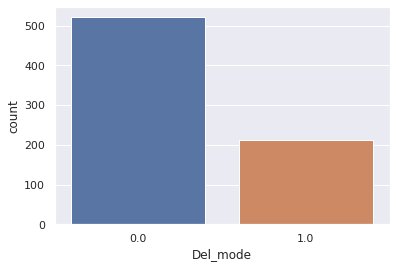

In [271]:
sns.countplot(df1['Del_mode'])


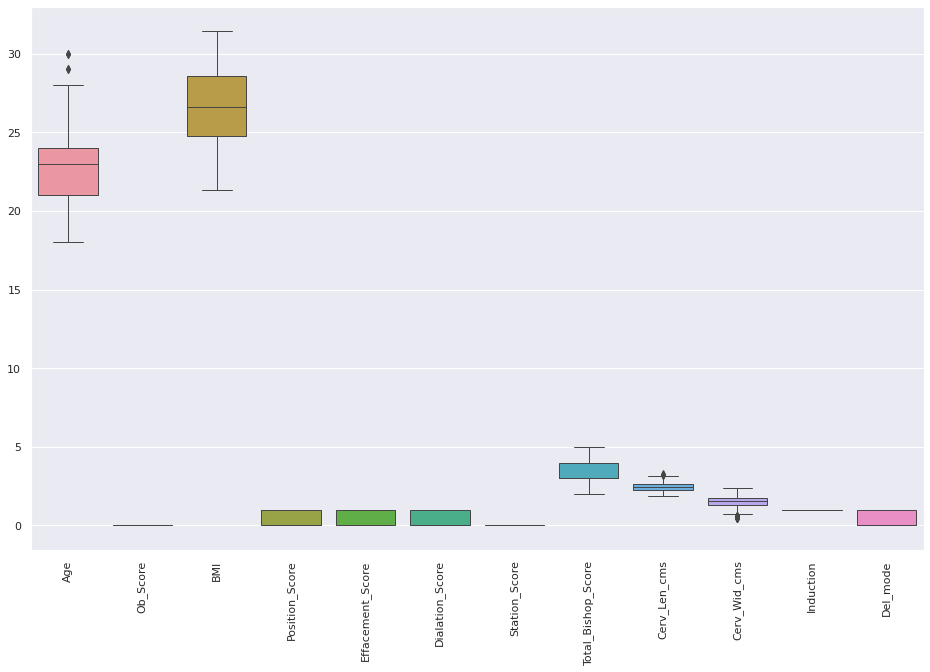

In [272]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df1, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [273]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,732.0,22.965847,2.206862,18.000000,21.000000,23.000000,24.000000,30.000000
Ob_Score,732.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BMI,732.0,26.605294,2.350415,21.300000,24.769010,26.584167,28.602236,31.415765
Position_Score,732.0,0.517760,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Effacement_Score,732.0,0.383880,0.486662,0.000000,0.000000,0.000000,1.000000,1.000000
Dialation_Score,732.0,0.478142,0.499864,0.000000,0.000000,0.000000,1.000000,1.000000
Station_Score,732.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Total_Bishop_Score,732.0,3.438525,0.954673,2.000000,3.000000,3.000000,4.000000,5.000000
Cerv_Len_cms,732.0,2.466463,0.264258,1.870000,2.257082,2.462970,2.620523,3.239984
Cerv_Wid_cms,732.0,1.525365,0.352153,0.493955,1.285786,1.565271,1.717773,2.350850


In [274]:
df1['Del_mode'].value_counts()

0.0    521
1.0    211
Name: Del_mode, dtype: int64

In [275]:
#### Independent and Dependent Features
X=df1.drop("Del_mode",axis=1)
Y=df1['Del_mode']

In [276]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scale = sc.fit_transform(X)

In [277]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_scale,Y,test_size = 0.3, random_state=0,stratify=Y)

In [278]:
X_train.shape ,X_test.shape ,Y_train.shape,Y_test.shape

((512, 11), (220, 11), (512,), (220,))

**Logistic Regression with Hyperparameter tuning**



In [279]:
#10.0 **np.arange(-2,3)

In [280]:
#log_class=LogisticRegression()
#grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
#cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [281]:
#clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
#clf.fit(X_train,Y_train)

In [282]:
#y_pred_logreg=clf.predict(X_test)
#print(confusion_matrix(Y_test,y_pred_logreg))
#print(accuracy_score(Y_test,y_pred_logreg))
#print(classification_report(Y_test,y_pred_logreg))

No Improvement in accuracy and other metrics after hyperparameter tuning

In [283]:
X_train.shape, Y_train.shape

((512, 11), (512,))

**Under Sampling**

In [284]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler  
under_sampler = RandomUnderSampler()
X_train_us,Y_train_us = under_sampler.fit_resample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_us)))

The number of classes before fit Counter({0.0: 364, 1.0: 148})
The number of classes after fit Counter({0.0: 148, 1.0: 148})


**Logistic Regression with UnderSampling**

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
logreg = LogisticRegression()
logreg.fit(X_train_us,Y_train_us)
y_pred_lr_us = logreg.predict(X_test)

In [286]:
print(confusion_matrix(Y_test,y_pred_lr_us))
print(accuracy_score(Y_test,y_pred_lr_us))
print(classification_report(Y_test,y_pred_lr_us))

[[114  43]
 [ 12  51]]
0.75
              precision    recall  f1-score   support

         0.0       0.90      0.73      0.81       157
         1.0       0.54      0.81      0.65        63

    accuracy                           0.75       220
   macro avg       0.72      0.77      0.73       220
weighted avg       0.80      0.75      0.76       220



**KNN with Undersampling**

In [287]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1, p=2) 
knn_clf.fit(X_train_us,Y_train_us)
Y_pred_knn_us = knn_clf.predict(X_test)

In [288]:
print(confusion_matrix(Y_test,Y_pred_knn_us))
print(accuracy_score(Y_test,Y_pred_knn_us))
print(classification_report(Y_test,Y_pred_knn_us))

[[138  19]
 [  9  54]]
0.8727272727272727
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       157
         1.0       0.74      0.86      0.79        63

    accuracy                           0.87       220
   macro avg       0.84      0.87      0.85       220
weighted avg       0.88      0.87      0.88       220



With Default Value Acc_score is 0.8590909090909091

With n_neigbour=1, Acc_score is 0.9272727272727272

With Undersampling technique, acc_score of KNN is 0.8909090909090909


In [289]:
kn_score1 = []
neighbors = range(1,20)

for i in neighbors:
        knn_clf = KNeighborsClassifier(n_neighbors=i, p=2)
        knn_clf.fit(X_train_us,Y_train_us)
        Y_pred_knn = knn_clf.predict(X_test)
        kn_score1.append(accuracy_score(Y_test,Y_pred_knn))

print(kn_score1)

[0.8727272727272727, 0.8590909090909091, 0.8136363636363636, 0.8045454545454546, 0.7772727272727272, 0.8136363636363636, 0.7545454545454545, 0.7681818181818182, 0.7, 0.7227272727272728, 0.7136363636363636, 0.7272727272727273, 0.6909090909090909, 0.7, 0.6772727272727272, 0.7136363636363636, 0.7181818181818181, 0.740909090909091, 0.7045454545454546]


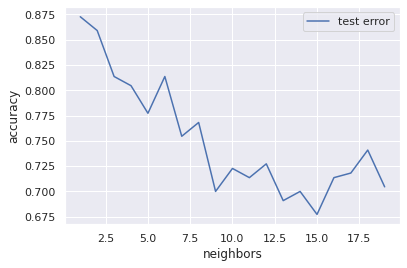

In [290]:
plt.plot(neighbors,kn_score1, label = "test error")
plt.ylabel("accuracy")
plt.xlabel("neighbors")
plt.legend()

**Support vector machine**

In [291]:
from sklearn.svm import SVC


In [292]:
svm = SVC(kernel = "linear", gamma = "auto")
svm.fit(X_train_us,Y_train_us)
Y_pred_svm_linear_us = svm.predict(X_test)

In [293]:
print(confusion_matrix(Y_test,Y_pred_svm_linear_us))
print(accuracy_score(Y_test,Y_pred_svm_linear_us))
print(classification_report(Y_test,Y_pred_svm_linear_us))

[[115  42]
 [ 10  53]]
0.7636363636363637
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.82       157
         1.0       0.56      0.84      0.67        63

    accuracy                           0.76       220
   macro avg       0.74      0.79      0.74       220
weighted avg       0.82      0.76      0.77       220



In [294]:
svm = SVC(kernel = "rbf", gamma = "auto")
svm.fit(X_train_us,Y_train_us)
Y_pred_svm_rbf_us = svm.predict(X_test)


In [295]:
print(confusion_matrix(Y_test,Y_pred_svm_rbf_us))
print(accuracy_score(Y_test,Y_pred_svm_rbf_us))
print(classification_report(Y_test,Y_pred_svm_rbf_us))

[[130  27]
 [ 13  50]]
0.8181818181818182
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       157
         1.0       0.65      0.79      0.71        63

    accuracy                           0.82       220
   macro avg       0.78      0.81      0.79       220
weighted avg       0.83      0.82      0.82       220



In [296]:
svm = SVC(kernel = "poly", gamma = "auto")
svm.fit(X_train_us,Y_train_us)
Y_pred_svm_poly_us = svm.predict(X_test)

In [297]:
print(confusion_matrix(Y_test,Y_pred_svm_poly_us))
print(accuracy_score(Y_test,Y_pred_svm_poly_us))
print(classification_report(Y_test,Y_pred_svm_poly_us))

[[124  33]
 [ 14  49]]
0.7863636363636364
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84       157
         1.0       0.60      0.78      0.68        63

    accuracy                           0.79       220
   macro avg       0.75      0.78      0.76       220
weighted avg       0.81      0.79      0.79       220



In the support vector machine, kernel = "rbf" gave better accuracy when compared to linear and rbf.


**Stocastic Gradient Classifier**

In [298]:
from sklearn.linear_model import SGDClassifier

In [299]:
sgd = SGDClassifier(eta0 = 0.1011, max_iter = 50)
sgd.fit(X_train_us,Y_train_us)
Y_pred_sgd_us = sgd.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [300]:
print(confusion_matrix(Y_test,Y_pred_sgd_us))
print(accuracy_score(Y_test,Y_pred_sgd_us))
print(classification_report(Y_test,Y_pred_sgd_us))

[[135  22]
 [ 49  14]]
0.6772727272727272
              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79       157
         1.0       0.39      0.22      0.28        63

    accuracy                           0.68       220
   macro avg       0.56      0.54      0.54       220
weighted avg       0.63      0.68      0.65       220



In [301]:
sgd_score = []
setting = np.arange(0.101,0.102,0.0001)

for i in setting:
    sgd = SGDClassifier(eta0 = i, max_iter = 50)
    sgd.fit(X_train_us,Y_train_us)
    Y_pred_sgd = sgd.predict(X_test)
    sgd_score.append(accuracy_score(Y_test,Y_pred_sgd))
    
print(sgd_score)

[0.7318181818181818, 0.7772727272727272, 0.6954545454545454, 0.740909090909091, 0.6727272727272727, 0.7181818181818181, 0.6909090909090909, 0.6590909090909091, 0.6681818181818182, 0.740909090909091]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


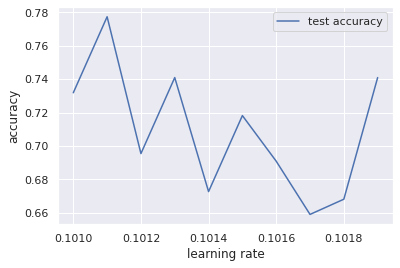

In [302]:
plt.plot(setting,sgd_score, label = "test accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

**Decision Tree classifier**

In [303]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 8)
dt.fit(X_train_us,Y_train_us)
Y_pred_dt_us = dt.predict(X_test)

In [304]:
dt.tree_.node_count, dt.tree_.max_depth

(65, 8)

In [305]:
print(confusion_matrix(Y_test,Y_pred_dt_us))
print(accuracy_score(Y_test,Y_pred_dt_us))
print(classification_report(Y_test,Y_pred_dt_us))

[[122  35]
 [ 11  52]]
0.7909090909090909
              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84       157
         1.0       0.60      0.83      0.69        63

    accuracy                           0.79       220
   macro avg       0.76      0.80      0.77       220
weighted avg       0.83      0.79      0.80       220



In [306]:
dt_score = []
md = range(1,14)
for i in md:
    dt = DecisionTreeClassifier(criterion = "gini", max_depth = i)
    dt.fit(X_train_us,Y_train_us)
    Y_pred_dt_us = dt.predict(X_test)
    dt_score.append(accuracy_score(Y_test,Y_pred_dt_us))

print(dt_score)

[0.7, 0.4772727272727273, 0.7454545454545455, 0.7954545454545454, 0.8227272727272728, 0.8318181818181818, 0.8045454545454546, 0.7681818181818182, 0.7954545454545454, 0.8272727272727273, 0.8227272727272728, 0.8, 0.7954545454545454]


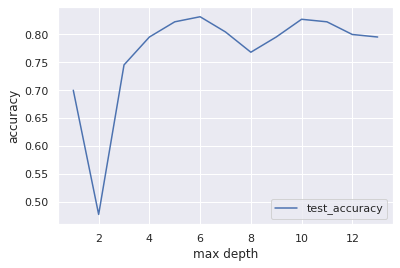

In [307]:
plt.plot(md,dt_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("max depth")
plt.legend()

**BaggingClassifier**

In [308]:
from sklearn.ensemble import BaggingClassifier


In [309]:
bag = BaggingClassifier(base_estimator = dt, max_samples = 0.6)
bag.fit(X_train_us,Y_train_us)
Y_pred_bag_us = bag.predict(X_test)

In [310]:
print(confusion_matrix(Y_test,Y_pred_bag_us))
print(accuracy_score(Y_test,Y_pred_bag_us))
print(classification_report(Y_test,Y_pred_bag_us))

[[133  24]
 [ 10  53]]
0.8454545454545455
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       157
         1.0       0.69      0.84      0.76        63

    accuracy                           0.85       220
   macro avg       0.81      0.84      0.82       220
weighted avg       0.86      0.85      0.85       220



In [311]:
bag_score = []
ms = np.arange(0.1,1,0.1)
for i in ms:
    bag = BaggingClassifier(base_estimator = dt, max_samples = i)
    bag.fit(X_train_us,Y_train_us)
    Y_pred_bag_us = bag.predict(X_test)
    bag_score.append(accuracy_score(Y_test,Y_pred_bag_us))
    
print(bag_score)

[0.7045454545454546, 0.8, 0.8318181818181818, 0.85, 0.8681818181818182, 0.8636363636363636, 0.8454545454545455, 0.8590909090909091, 0.8681818181818182]


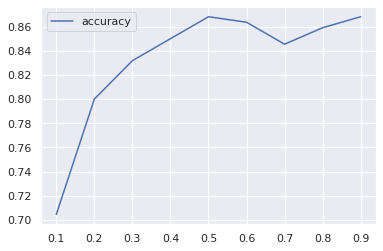

In [312]:
plt.plot(ms,bag_score,label = "accuracy")
plt.legend()

From the above the graph the best accuracy is attained at 0.6 max_samples .0.9

**Random Forest Classifier**

In [313]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_features = 0.1, n_estimators = 36)
RF.fit(X_train_us,Y_train_us)
Y_pred_rf_us = RF.predict(X_test)

In [314]:
print(confusion_matrix(Y_test,Y_pred_rf_us))
print(accuracy_score(Y_test,Y_pred_rf_us))
print(classification_report(Y_test,Y_pred_rf_us))

[[140  17]
 [  8  55]]
0.8863636363636364
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       157
         1.0       0.76      0.87      0.81        63

    accuracy                           0.89       220
   macro avg       0.85      0.88      0.87       220
weighted avg       0.89      0.89      0.89       220



In [315]:
rf_score = []
mf = np.arange(0.1,1,0.1)
for i in mf:
    RF = RandomForestClassifier(max_features = i, n_estimators = 33)
    RF.fit(X_train_us,Y_train_us)
    Y_pred_rf_us = RF.predict(X_test)
    rf_score.append(accuracy_score(Y_test,Y_pred_rf_us))
    
print(rf_score)

[0.8909090909090909, 0.8909090909090909, 0.8772727272727273, 0.8727272727272727, 0.8954545454545455, 0.8681818181818182, 0.8909090909090909, 0.8727272727272727, 0.8636363636363636]


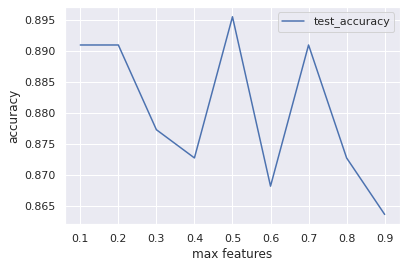

In [316]:
plt.plot(mf,rf_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("max features")
plt.legend()

In [317]:
rf_score1 = []
est = range(30,40,1)
for i in est:
    
    RF = RandomForestClassifier(max_features = 0.1, n_estimators = i)
    RF.fit(X_train_us,Y_train_us)
    Y_pred_rf_us = RF.predict(X_test)
    rf_score1.append(accuracy_score(Y_test,Y_pred_rf_us))
    
print(rf_score1)

[0.8818181818181818, 0.8863636363636364, 0.8727272727272727, 0.8727272727272727, 0.8863636363636364, 0.8590909090909091, 0.8863636363636364, 0.8772727272727273, 0.8681818181818182, 0.8863636363636364]


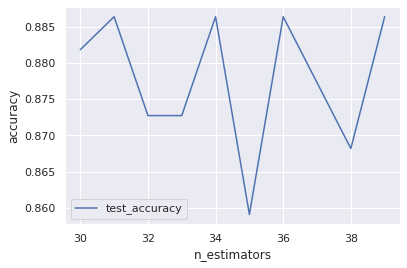

In [318]:
plt.plot(est,rf_score1,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

**Ada Boost Classifier**

In [319]:
from sklearn.ensemble import AdaBoostClassifier

In [320]:
adb = AdaBoostClassifier(base_estimator = dt, n_estimators = 30)
adb.fit(X_train_us,Y_train_us)
Y_pred_adb_us = adb.predict(X_test)

In [321]:
print(confusion_matrix(Y_test,Y_pred_adb_us))
print(accuracy_score(Y_test,Y_pred_adb_us))
print(classification_report(Y_test,Y_pred_adb_us))

[[129  28]
 [ 11  52]]
0.8227272727272728
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87       157
         1.0       0.65      0.83      0.73        63

    accuracy                           0.82       220
   macro avg       0.79      0.82      0.80       220
weighted avg       0.84      0.82      0.83       220



In [322]:
adb_score = []
est = range(1,100,10)
for i in est:
    adb = AdaBoostClassifier(base_estimator = dt, n_estimators = i)
    adb.fit(X_train_us,Y_train_us)
    Y_pred_adb_us = adb.predict(X_test)
    adb_score.append(accuracy_score(Y_test,Y_pred_adb_us))

print(adb_score)

[0.7954545454545454, 0.8181818181818182, 0.8318181818181818, 0.8227272727272728, 0.8090909090909091, 0.8272727272727273, 0.8090909090909091, 0.8318181818181818, 0.8363636363636363, 0.8227272727272728]


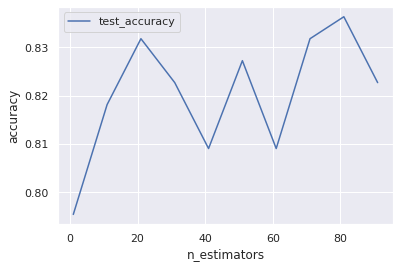

In [323]:
plt.plot(est,adb_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

From the above graph, choosing n_estimators = 30 which gave 90 accuracy the best accuracy of 92 is attained 

**Gradinet Boosting**



In [324]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.165)
gbr.fit(X_train_us,Y_train_us)
Y_pred_gbr_us = gbr.predict(X_test)

In [325]:
print(confusion_matrix(Y_test,Y_pred_gbr_us))
print(accuracy_score(Y_test,Y_pred_gbr_us))
print(classification_report(Y_test,Y_pred_gbr_us))

[[133  24]
 [  8  55]]
0.8545454545454545
              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89       157
         1.0       0.70      0.87      0.77        63

    accuracy                           0.85       220
   macro avg       0.82      0.86      0.83       220
weighted avg       0.87      0.85      0.86       220



In [326]:
gbr_score = []
setting = np.arange(0.01,0.2,0.01)
for i in setting:
    gbr = GradientBoostingClassifier(n_estimators = 100, learning_rate = i)
    gbr.fit(X_train_us,Y_train_us)
    Y_pred_gbr_us = gbr.predict(X_test)
    gbr_score.append(accuracy_score(Y_test,Y_pred_gbr_us))

print(gbr_score)

[0.8181818181818182, 0.8363636363636363, 0.8363636363636363, 0.8409090909090909, 0.8363636363636363, 0.85, 0.8636363636363636, 0.85, 0.85, 0.8545454545454545, 0.8590909090909091, 0.8636363636363636, 0.85, 0.8409090909090909, 0.8545454545454545, 0.8363636363636363, 0.8318181818181818, 0.8545454545454545, 0.8363636363636363]


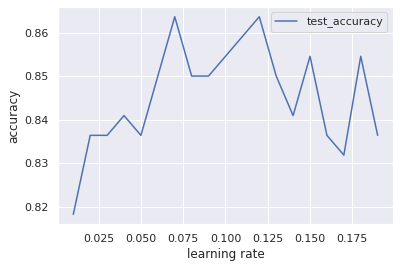

In [327]:
plt.plot(setting,gbr_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

From the above graph, the best accuracy of 0.89 is attained at learning rate = 0.165and f-score is almost similar for both the classes

**XG Boost**

In [328]:
from xgboost import XGBClassifier
XG = XGBClassifier(learning_rate = 0.14, gamma = 0, reg_lambda = 1, n_estimators = 100)
XG.fit(X_train_us,Y_train_us)
Y_pred_XG_us = XG.predict(X_test)

In [329]:
print(confusion_matrix(Y_test,Y_pred_XG_us))
print(accuracy_score(Y_test,Y_pred_XG_us))
print(classification_report(Y_test,Y_pred_XG_us))

[[135  22]
 [  8  55]]
0.8636363636363636
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90       157
         1.0       0.71      0.87      0.79        63

    accuracy                           0.86       220
   macro avg       0.83      0.87      0.84       220
weighted avg       0.88      0.86      0.87       220



In [330]:
XG_score = []
est = range(1,100,10)
for i in est:
    XG = XGBClassifier(learning_rate = 0.14, gamma = 0, reg_lambda = 1, n_estimators = i)
    XG.fit(X_train_us,Y_train_us)
    Y_pred_XG_us = XG.predict(X_test)
    XG_score.append(accuracy_score(Y_test,Y_pred_XG_us))

print(XG_score)

[0.740909090909091, 0.8409090909090909, 0.8409090909090909, 0.8454545454545455, 0.8545454545454545, 0.8545454545454545, 0.8727272727272727, 0.8818181818181818, 0.8818181818181818, 0.8636363636363636]


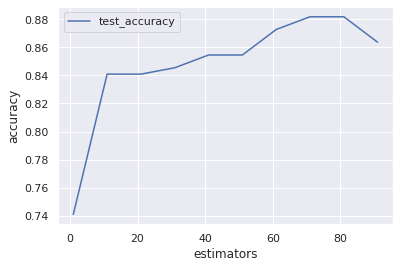

In [331]:
plt.plot(est,XG_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("estimators")
plt.legend()

In [332]:
print('Acc_XG_US:', accuracy_score(Y_test,Y_pred_XG_us))
print('Acc_GRB_US:', accuracy_score(Y_test,Y_pred_gbr_us))
print('Acc_ADB_US:', accuracy_score(Y_test,Y_pred_adb_us))
print('Acc_RF_US:', accuracy_score(Y_test,Y_pred_rf_us))
print('Acc_BAG_US:', accuracy_score(Y_test,Y_pred_bag_us))
print('Acc_DT_US:', accuracy_score(Y_test,Y_pred_dt_us))
print('Acc_SGD_US:', accuracy_score(Y_test,Y_pred_sgd_us))
print('Acc_SVM_POLY_US:', accuracy_score(Y_test,Y_pred_svm_poly_us))
print('Acc_SVM_RBF_US:', accuracy_score(Y_test,Y_pred_svm_rbf_us))
print('Acc_SVM_LINEAR_US:', accuracy_score(Y_test,Y_pred_svm_linear_us))
print('Acc_KNN_US:', accuracy_score(Y_test,Y_pred_knn_us))
print('Acc_LR_US:', accuracy_score(Y_test,y_pred_lr_us))

Acc_XG_US: 0.8636363636363636
Acc_GRB_US: 0.8363636363636363
Acc_ADB_US: 0.8227272727272728
Acc_RF_US: 0.8863636363636364
Acc_BAG_US: 0.8681818181818182
Acc_DT_US: 0.7954545454545454
Acc_SGD_US: 0.6772727272727272
Acc_SVM_POLY_US: 0.7863636363636364
Acc_SVM_RBF_US: 0.8181818181818182
Acc_SVM_LINEAR_US: 0.7636363636363637
Acc_KNN_US: 0.8727272727272727
Acc_LR_US: 0.75


Findings:

We should avoid undersampling technique as we lose huge amount of data.
Oversampling will be better than undersampling.